In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.optimize as sco
%matplotlib inline
sns.set_style("darkgrid") # whitegrid dark darkgrid ticks
sns.set_context("talk", font_scale=1.25, rc={"axes.labelsize" : 20, "axes.titlesize" : 20})

# Plots of Scaling
## For Diffusion

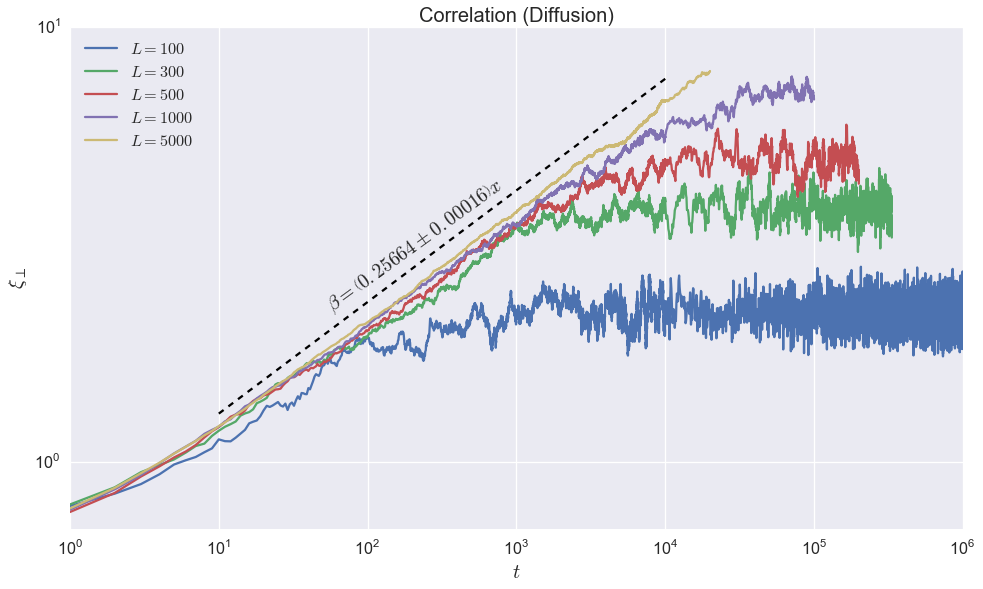

In [2]:
plots = [100,300,500,1000,5000] #Sizes
labels = [r"$L = {0}$".format(k) for k in plots] #Labels for legend

x = np.linspace(1e1, 1e4, 1000)
y = np.power(x, 0.25664323)/1.4

data = [np.loadtxt("final/corr"+ str(k) + ".txt") for k in plots] #Load the data

palette = sns.color_palette()

cosa = 10000
plt.figure(figsize=(16,9))
#For every file,
k = 0
for datafile in data:
    micolor = palette.pop(0)
    plt.plot(datafile[:cosa,0], datafile[:cosa,1], label = labels[k], color = micolor) #make a plot
    plt.plot(datafile[cosa-1::100,0], datafile[cosa-1::100,1], color = micolor) #make a plot
    k += 1
#Scale/ylim
plt.yscale('log')
plt.xscale('log')
plt.ylim((0.7,10))
#Fancy text
plt.text(50, 4.2, r"$\beta = \left ( 0.25664 \pm 0.00016 \right ) x$", rotation = 36)
plt.plot(x,y, color = "black", ls="--")
#Titles and labels
plt.title("Correlation (Diffusion)")
plt.xlabel(r"$t$")
plt.ylabel(r"$\xi _\perp$")
plt.legend(loc = "upper left")
#Save
plt.savefig("pres/graphs/difcor.eps", bbox_inches='tight')
plt.show()

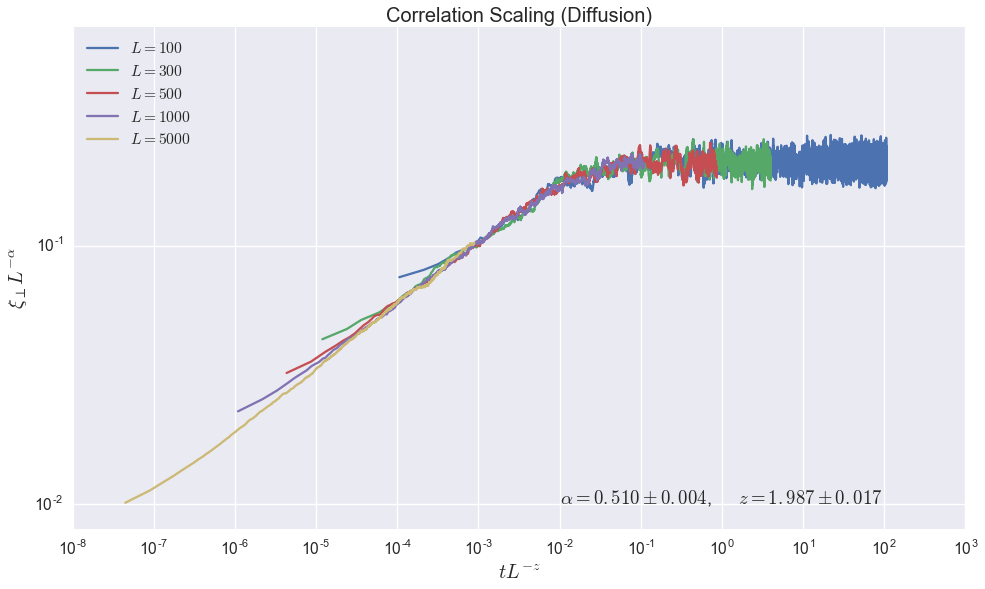

In [38]:
plots = [100,300,500,1000,5000] #Sizes
labels = [r"$L = {0}$".format(k) for k in plots] #Labels for legend

#data = [np.loadtxt("final/corr"+ str(k) + ".txt") for k in plots] #Load the data

a, b = 0.51006131, 0.25664323 #Critical exponent
da, db = 0.00411657, 0.00015977
z = a / b
dz = z * (da/a + db/b)


cosa = 10000
palette = sns.color_palette()


plt.figure(figsize=(16,9))
k=0
for k in xrange(len(plots)):
    micolor = palette.pop(0)
    plt.plot(data[k][1:cosa,0] / plots[k]**(z), data[k][1:cosa,1] / plots[k]**(a), label=labels[k], color = micolor) #Compute the scaling
    plt.plot(data[k][cosa-1::100,0] / plots[k]**(z), data[k][cosa-1::100,1] / plots[k]**(a), color = micolor) #Compute the scaling
    k += 1
plt.text(0.01, 0.01, r"$\alpha = {0:.3f} \pm {1:.3f} $,  $\quad z = {2:.3f} \pm  {3:.3f}$".format(a,da,z,dz))
plt.yscale('log')
plt.xscale('log')
plt.ylim((0.008, 0.7))
#Titles and labels
plt.title("Correlation Scaling (Diffusion)")
plt.xlabel(r"$t L^{-z}$")
plt.ylabel(r"${\xi _\perp} {L^{-\alpha}}$")
plt.legend(loc = "upper left")


#Save
plt.savefig("pres/graphs/difcorsca.eps", bbox_inches='tight')

plt.show()

## Data Analysis: computation of exponent  $\beta$

In [39]:
data = np.loadtxt("final/corr5000.txt") #Load the data


popt, pcov = sco.curve_fit(lambda x,r,s : s*np.power(x, r), data[:,0], data[:,1])
perr = np.sqrt(np.diag(pcov)) #And compute its errors

print(popt)
print(perr)

[ 0.25664323  0.62784071]
[ 0.00015977  0.00092949]


[ 0.51006131  0.209407  ]
[ 0.00411657  0.00556163]


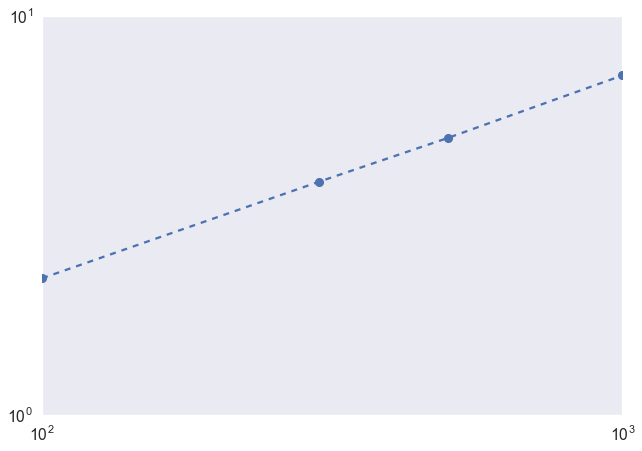

In [56]:
plots = [100,300,500,1000] #Sizes

#data = [np.loadtxt("final/corr"+ str(k) + ".txt") for k in plots] #Load the data

starts = [1000, 10000, 10000, 70000]
results = np.empty(2*len(plots))

k = 0
for s in starts:
    results[2*k], results[2*k+1] = np.mean(data[k][s:, 1]), np.std(data[k][s:, 1])
    k += 1


popt, pcov = sco.curve_fit(lambda x,r,s : s*np.power(x, r), plots, results[::2])
perr = np.sqrt(np.diag(pcov)) #And compute its errors
print(popt)
print(perr)

#TODO ADD ERRORS

plt.figure()
plt.plot(plots, results[::2], marker = "o", ls="--")
plt.yscale('log')
plt.xscale('log')

plt.show()


Value of $\alpha = 0.510 \pm 0.004$

## For Ballistic

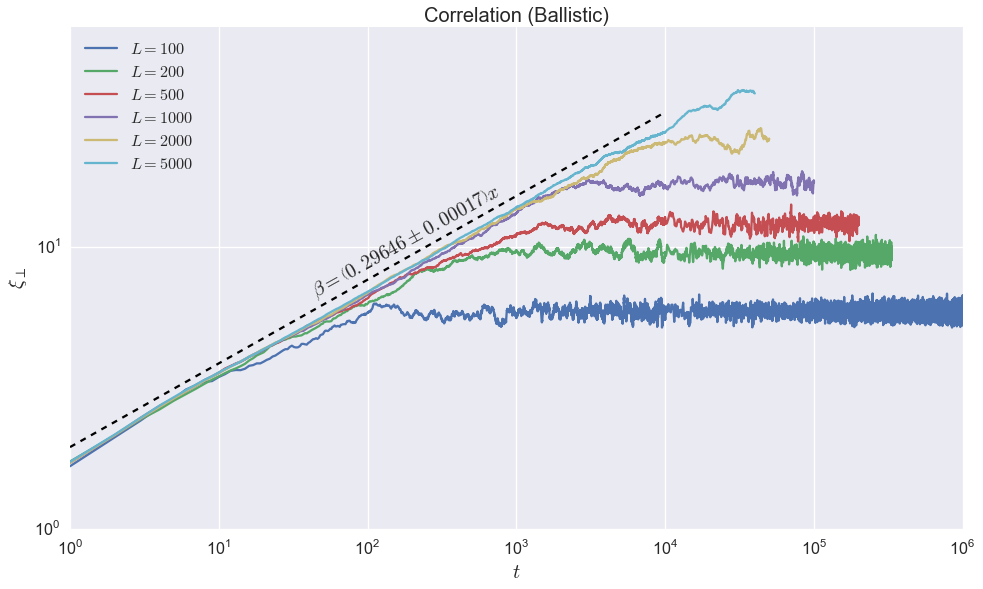

In [3]:
plots = [100,200,500,1000,2000,5000] #Sizes
labels = [r"$L = {0}$".format(k) for k in plots] #Labels for legend

data = [np.loadtxt("final/corrbal"+ str(k) + ".txt") for k in plots] #Load the data

x = np.linspace(1e0, 1e4, 1000)
y = np.power(x, 0.29645508)*1.95

cosa = 10000
palette = sns.color_palette()

plt.figure(figsize=(16,9))
#For every file,
k = 0
for datafile in data:
    micolor = palette.pop(0)
    plt.plot(datafile[:cosa:,0], datafile[:cosa:,1], label = labels[k], color = micolor) #make a plot
    plt.plot(datafile[cosa-1::100,0], datafile[cosa-1::100,1], color = micolor) #make a plot
    k += 1
#Scale/ylim
plt.yscale('log')
plt.xscale('log')
#Text
plt.plot(x,y, ls="--", color="black")
plt.text(40, 15.0, r"$\beta = \left ( 0.29646 \pm 0.00017 \right ) x$", rotation = 29)
#Titles and labels
plt.title("Correlation (Ballistic)")
plt.xlabel(r"$t$")
plt.ylabel(r"$\xi _\perp$")
plt.ylim((1,60))
plt.legend(loc = "upper left")
#Save
plt.savefig("pres/graphs/corbal.eps", bbox_inches='tight')
plt.show()

1.39104696739


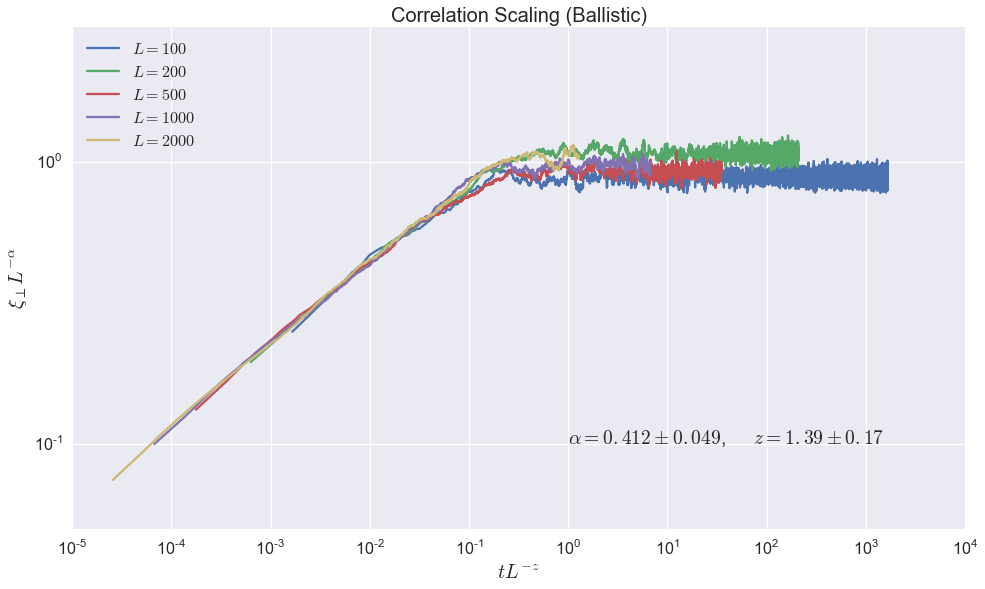

In [5]:
plots = [100,200,500,1000,2000] #Sizes
labels = [r"$L = {0}$".format(k) for k in plots] #Labels for legend

data = [np.loadtxt("final/corrbal"+ str(k) + ".txt") for k in plots] #Load the data

a, b = 0.41238294, 0.29645508 #Critical exponent
da, db = 0.04901941, 0.00016515
z = a / b
dz = z * (da/a + db/b)

print(z)

cosa = 10000
palette = sns.color_palette()

plt.figure(figsize=(16,9))
k=0
for k in xrange(len(plots)):
    micolor = palette.pop(0)
    plt.plot(data[k][1:cosa:,0] / plots[k]**(z), data[k][1:cosa:,1] / plots[k]**(a), label=labels[k], color = micolor) #Compute the scaling
    plt.plot(data[k][cosa-1::100,0] / plots[k]**(z), data[k][cosa-1::100,1] / plots[k]**(a), color = micolor) #Compute the scaling
    k += 1
plt.text(1, 0.1, r"$\alpha = {0:.3f} \pm {1:.3f} $,  $\quad z = {2:.2f} \pm  {3:.2f}$".format(a,da,z,dz))
plt.yscale('log')
plt.xscale('log')
plt.ylim(0.05,3)
#Titles and labels
plt.title("Correlation Scaling (Ballistic)")
plt.xlabel(r"$t L^{-z}$")
plt.ylabel(r"${\xi _\perp} {L^{-\alpha}}$")
plt.legend(loc = "upper left")

#Save
plt.savefig("pres/graphs/corbalsca.eps", bbox_inches='tight')
plt.show()

## Data Analysis

In [5]:
data = np.loadtxt("final/corrbal5000.txt") #Load the data


popt, pcov = sco.curve_fit(lambda x,r,s : s*np.power(x, r), data[:4000,0], data[:4000,1])
perr = np.sqrt(np.diag(pcov)) #And compute its errors

print(popt)
print(perr)


[ 0.29645508  1.77711086]
[ 0.00016515  0.00225752]


(5.8911701531155787, 0.22768258770103475)
(9.5074035882472945, 0.38771972530868781)
(12.028237261578948, 0.49167818868533369)
(16.798784198888889, 0.63569384436010146)
[ 0.41238294  0.9659987 ]
[ 0.04901941  0.30130013]


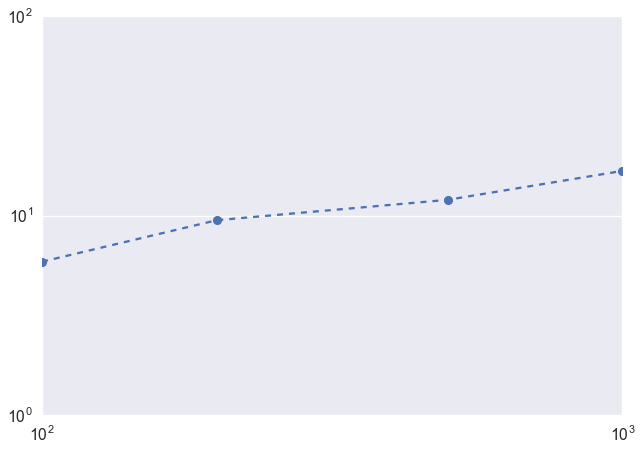

In [27]:
plots = [100,200,500,1000] #Sizes

data = [np.loadtxt("final/corrbal"+ str(k) + ".txt") for k in plots] #Load the data

starts = [5000, 5000, 10000, 10000]
results = np.empty(2*len(plots))

k = 0
for s in starts:
    results[2*k], results[2*k+1] = np.mean(data[k][s:, 1]), np.std(data[k][s:, 1])
    print(results[2*k], results[2*k+1])
    k += 1


popt, pcov = sco.curve_fit(lambda x,r,p : p*np.power(x, r), plots, results[::2])
perr = np.sqrt(np.diag(pcov)) #And compute its errors
print(popt)
print(perr)

#TODO ADD ERRORS

plt.figure()
plt.plot(plots, results[::2], marker = "o", ls="--")
plt.yscale('log')
plt.xscale('log')

plt.show()

# KPZ analytic
## Scaling

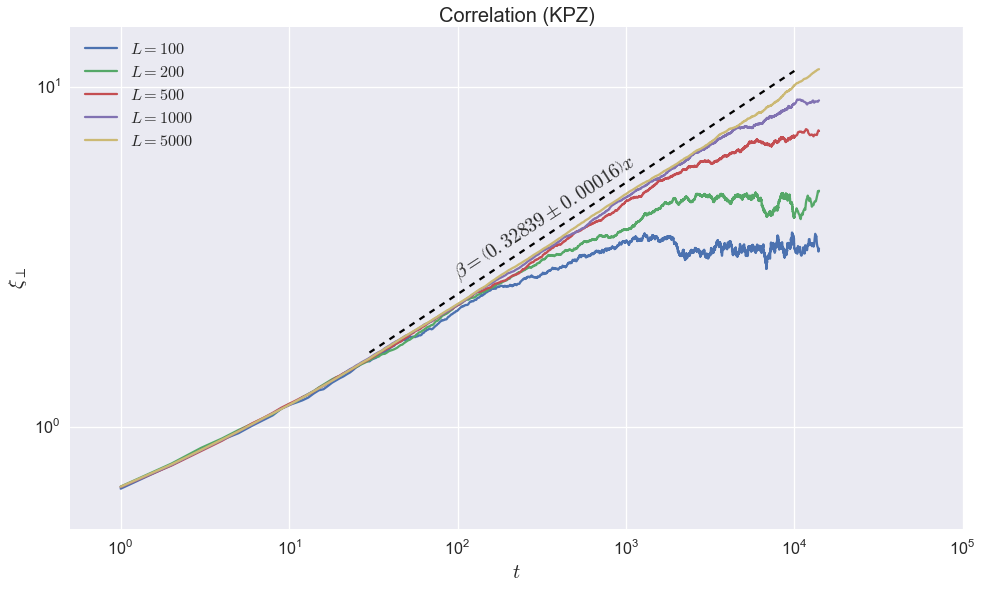

In [4]:
plots = [100,200,500,1000,5000] #Sizes
labels = [r"$L = {0}$".format(k) for k in plots] #Labels for legend

x = np.linspace(3e1, 1e4, 1000)
y = np.power(x, 0.32839373)/1.85

data = [np.loadtxt("final/corrkpz"+ str(k) + ".txt") for k in plots] #Load the data

cosa = 10000
palette = sns.color_palette()
plt.figure(figsize=(16,9))
#For every file,
k = 0
for datafile in data:
    micolor = palette.pop(0)
    plt.plot(datafile[1:cosa:,0], datafile[1:cosa:,1], label = labels[k], color=micolor) #make a plot
    plt.plot(datafile[cosa-1::100,0], datafile[cosa-1::100,1], color=micolor) #make a plot
    k += 1
#Scale/ylim
plt.yscale('log')
plt.xscale('log')
plt.xlim(0.5,1e5)
plt.ylim((0.5,15))
#Fancy text
plt.text(90, 5.8, r"$\beta = \left ( 0.32839 \pm 0.00016 \right ) x$", rotation = 33)
plt.plot(x,y, color = "black", ls="--")
#Titles and labels
plt.title("Correlation (KPZ)")
plt.xlabel(r"$t$")
plt.ylabel(r"$\xi _\perp$")
plt.legend(loc = "upper left")
#Save
plt.savefig("pres/graphs/kpzcor.eps", bbox_inches='tight')
plt.show()

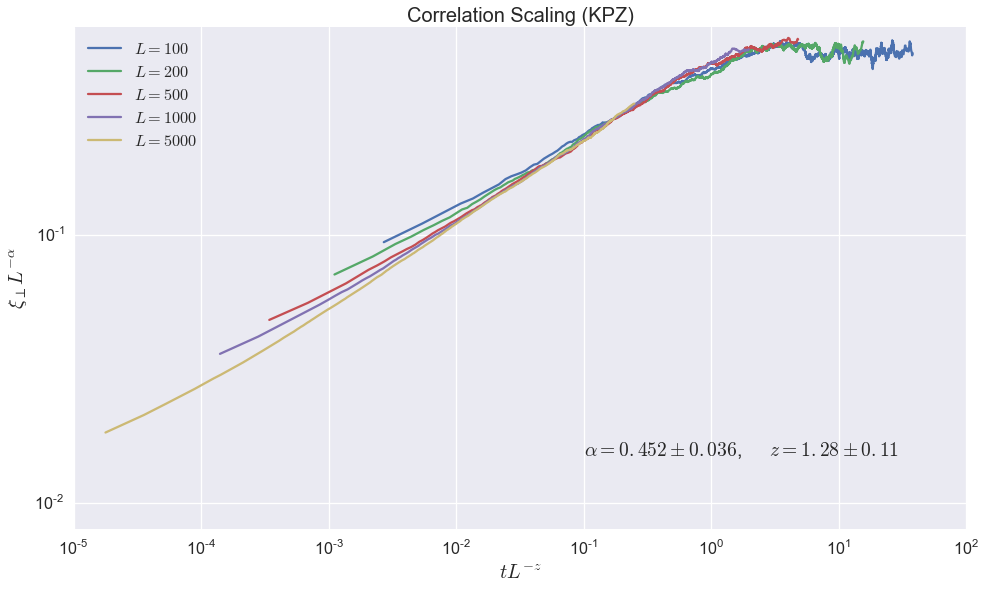

In [5]:
plots = [100,200,500,1000,5000] #Sizes
labels = [r"$L = {0}$".format(k) for k in plots] #Labels for legend

data = [np.loadtxt("final/corrkpz"+ str(k) + ".txt") for k in plots] #Load the data

a, b = 0.42176342, 0.32839373 #Critical exponent
da, db = 0.03623897, 0.00016438
z = a / b
dz = z * (da/a + db/b)

cosa = 10000
palette = sns.color_palette()
plt.figure(figsize=(16,9))

plt.figure(figsize=(16,9))
k=0
for k in xrange(len(plots)):
    micolor = palette.pop(0)
    plt.plot(data[k][1:cosa,0] / plots[k]**(z), data[k][1:cosa,1] / plots[k]**(a), label=labels[k],color=micolor) #Compute the scaling
    plt.plot(data[k][cosa-1::100,0] / plots[k]**(z), data[k][cosa-1::100,1] / plots[k]**(a), color=micolor) #Compute the scaling
    k += 1
a = 0.4523
plt.text(0.1, 0.015, r"$\alpha = {0:.3f} \pm {1:.3f} $,  $\quad z = {2:.2f} \pm  {3:.2f}$".format(a,da,z,dz))

plt.yscale('log')
plt.xscale('log')
plt.ylim((0.008, 0.6))
#Titles and labels
plt.title("Correlation Scaling (KPZ)")
plt.xlabel(r"$t L^{-z}$")
plt.ylabel(r"${\xi _\perp} {L^{-\alpha}}$")
plt.legend(loc = "upper left")

#Save
plt.savefig("pres/graphs/kpzsca.eps", bbox_inches='tight')
plt.show()

## Data Analysis

In [6]:
data = np.loadtxt("final/corrkpz5000.txt") #Load the data


popt, pcov = sco.curve_fit(lambda x,r,s : s*np.power(x, r), data[:,0], data[:,1])
perr = np.sqrt(np.diag(pcov)) #And compute its errors

print(popt)
print(perr)

[ 0.32839373  0.48567065]
[ 0.00016438  0.00071559]


[ 0.42176342  0.50105178]
[ 0.03623897  0.11570813]


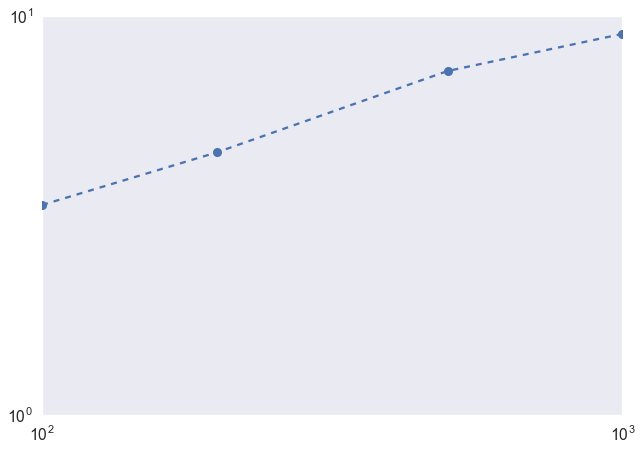

In [10]:
plots = [100,200,500,1000] #Sizes

data = [np.loadtxt("final/corrkpz"+ str(k) + ".txt") for k in plots] #Load the data

starts = [1000, 3000, 10000, 10000]
results = np.empty(2*len(plots))

k = 0
for s in starts:
    results[2*k], results[2*k+1] = np.mean(data[k][s:, 1]), np.std(data[k][s:, 1])
    k += 1


popt, pcov = sco.curve_fit(lambda x,r,s : s*np.power(x, r), plots, results[::2])
perr = np.sqrt(np.diag(pcov)) #And compute its errors
print(popt)
print(perr)

#TODO ADD ERRORS

plt.figure()
plt.plot(plots, results[::2], marker = "o", ls="--")
plt.yscale('log')
plt.xscale('log')

plt.show()